# 회귀 Intro
- 회귀란 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭
- 예를 들어 아파트의 방 개수, 방 크기, 주변 학군 등 여러 개의 독립변수에 따라 아파트 가격이라는 종속변수가 어떤 관계를 나타내는지를 모델링하고 예측하는 것.
$$Y=W_1 \cdot X_1 + W_2 \cdot X_2 + ... + W_n \cdot X_n$$
- Y가 종속변수, 즉 아파트 가격 <결정값>
- X가 독립변수, 즉 아파트의 방 개수, 방 크기, 주변 학군 등 <피처>
- $W_1, W_2, ... W_n$이 독립변수의 값에 영향을 미치는 회귀 계수(Regression Coefficients)
- 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것
- 회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 유형이 달라지지만 가장 중요한 것은 회귀 계수
- 회귀 계수가 선형이나 아니냐에 따라서 선형 회귀와 비선형 회귀로 나눌 수 있음
- 그리고 독립변수의 갯수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉨
- 선형 회귀는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식
- 선형 회귀 모델은 규제(Regularization) 방법에 따라 다시 별도의 유형으로 나뉠 수 있음
- 규제는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것을 말함
|모델|설명|
|:-|:-|
|**일반 선형 회귀**|예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화 할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)을 하지 않은 모델|
|**릿지(Ridge)**|릿지회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델. 릿지회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수 값을 더 작게 만드는 규제 모델|
|**라쏘(Lasso)**|라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것. 이러한 특성 때문에 L1 규제는 피처 선택 기능으로 불림|
|**엘라스틱넷(Elastic Net)**|L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에 적용되며, L1 규제로 피처의 갯수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정함|
|**로지스틱 회귀(Logistic Regression)**|분류에 사용되는 선형 모델. 일반적으로 이진 분류 뿐만 아니라 희소영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서도 뛰어난 예측 성능을 보임|

# 단순 선형 회귀를 통한 회귀 이해

- 단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀
![image](https://user-images.githubusercontent.com/70187490/130596245-2c0d6103-164a-4071-ad59-afea84e2f8bf.png)
- X축이 주택의 크기 축(평당 크기)이고 Y축이 주택의 가격 축인 2차원 평면에서 주택가격은 특정 기울기와 절편을 가진 1차 함수식으로 모델링할 수 있음
- 즉 예측값 $\hat{Y}=w_0 + w_1\cdot X$로 계산이 가능
- 독립변수가 1개인 단순 선형 회귀에서는 이 기울기 w1과 절편 w0을 회귀 계수로 지칭함
- 실제 주택 가격은 1차 함수 값에서 실제 값만큼의 오류 값을 뺀 값 ($w_0 + w_1 \cdot X$+오류값)
- 이렇게 실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부름
- 최적의 회귀모델을 만든다는 것은 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미
![image](https://user-images.githubusercontent.com/70187490/130596939-9e777cbc-080a-46bc-a6d6-29b4229d7a8b.png)
- 보통 오류 합을 계산할 때는 절댓값을 취해서 더하거나(Mean Absolute Error), 오류 값의 제곱을 구해서 더하는 방식(RSS, Residual Sum of Square)을 취함
- 일반적으로 미분등의 계산을 편리하게 하기 위해서 RSS(Residual Sum of Square)방식으로 오류 합을 구함
- RSS를 최소로 하는 $w_0, w_1$, 즉 머신러닝이 회귀계수를 학습을 통해 찾아나감
$$RSS(w_0, w_1)= \frac{1}{N} \sum_{i=1}^N(y_i-(w_0+w_1 \cdot x_i))^2$$
- 회귀에서 이 RSS는 비용(Cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용함수라 함
- 데이터를 계속 학습하면서 이 비용함수가 반환하는 값(즉, 오류값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것

# 경사하강법(Gradient Descent)
- 비용 함수 $RSS(w_0, w_1)$를 R(w)라고 생각할 때, R(w)는 변수가 w파라미터로 이뤄진 함수이며 $R(w)= \frac{1}{N} \sum_{i=1}^N(y_i-(w_0+w_1 \cdot x_i))^2$임
- R(w)를 최소화하는 $w_0$와 $w_1$의 값은 각각 r(w)를 $w_0$와 $w_1$으로 편미분하여 얻을 수 있음
- R(w)를 $w_0$,$w_1$으로 순차적으로 편미분한 결과는 다음과 같음
$${\partial R(w)\over\partial w_1}=\frac{2}{N} \sum_{i=1}^N -x_i \cdot (y_i -(w_0+w_1x_i)=\frac{2}{N} \sum_{i=1}^N -x_i(Target \ value-Predict \ value)$$
$${\partial R(w)\over\partial w_0}=\frac{2}{N} \sum_{i=1}^N -(y_i -(w_0+w_1x_i)=-\frac{2}{N} \sum_{i=1}^N (Target \ value-Predict \ value)$$
- 즉 저 두 식을 반복적으로 보정하면서 $w_0$,$w_1$값을 업데이트하면서 R(w)를 최소화 되는 $w_0$,$w_1$의 값을 구할 수 있다.
- 업데이트는 새로운 $w_1$을 이전 $w_1$에서 편미분 결괏값을 빼면서 적용함
- 위의 업데이트 값이 너무 클 수도 있기에 보정계수 $\alpha$를 곱하는 데 이를 학습률이라고 함
- 경사하강법의 프로세스
    - Step 1: $w_1, w_0$를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산함
    - Step 2: $w_1$을 $ w_1 + \alpha \frac{2}{N} \sum_{i=1}^N -x_i$(실제값-예측값), $w_0$를 $- \alpha \frac{2}{N} \sum_{i=1}^N $(실제값-예측값)으로 업데이트한 후 다시 비용 함수의 값을 계산함
    - Step 3: 비용 함수의 값이 감소했으면 다시 Step 2를 반복함. 더 이상 비용 함수의 값이 감소하지 않으면 그때 $w_1, w_0$를 구하고 반복을 중지

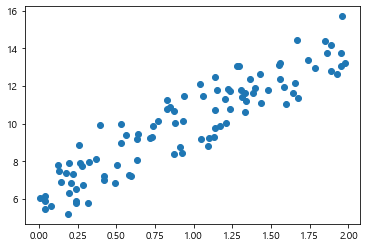

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# y = 4x + 6근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y);

In [2]:
# 비용함수를 구하는 함수
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [3]:
# 경사하강법을 수행하는 함수
def get_weight_update(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    # 먼저 w1_update, w0_updete를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열을 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [4]:
# 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트하는 함수 
def gradinet_descent_steps(X, y, iters=10000):
    
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1, w0, X, y, learning_rate=0.01)

        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [5]:
# 실제값의 RSS 차이를 계산하는 함수
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradinet_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


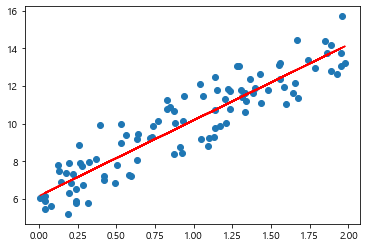

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred, c='r');

In [12]:
# 확률적 경사하강법을 계산하는 함수
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0]) # permutation array형태로 셔플된 결과값을 반환
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_update(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [13]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


# 회귀 평가 지표
- 실제 값과 회귀 예측 값의 차이 값을 기반으로 함
- 길제값과 예측값의 차이를 그냥 더하면 오류가 상쇄되기 때문에 절댓값 평균이나 제곱, 또는 제곱한 뒤 루트를 씌운 평균값으로 값을 구함

|평가지표|설명|수식|
|:-|:-|:-|
|MAE|Mean Absolute Error(MAE)이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것| $$MAE=\frac{1}{n}\sum\ \left\vert Y_i- \hat{Y}_i\right\vert $$ |
|MSE|Mean Square Error(MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것|$$MSE=\frac{1}{n}\sum\ (Y_i- \hat{Y}_i)^2$$|
|RMSE|MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE(Root Mean Square Error)|$$RMSE=\sqrt{\frac{1}{n}\sum\ (Y_i- \hat{Y}_i)^2}$$|
|$R^2$|분산 기반으로 예측 성능을 평가함. 실제값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높음|$$R^2=\frac{Predict \ Variance}{Target \ Variance}$$|